In [1]:
!pip install scikit-learn pandas numpy matplotlib wordcloud


   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/299.9 kB 1.9 MB/s eta 0:00:01
   ----- ---------------------------------- 41.0/299.9 kB 1.9 MB/s eta 0:00:01
   ----- ---------------------------------- 41.0/299.9 kB 1.9 MB/s eta 0:00:01
   ----- ---------------------------------- 41.0/299.9 kB 1.9 MB/s eta 0:00:01
   ----- ---------------------------------- 41.0/299.9 kB 1.9 MB/s eta 0:00:01
   --------------- ---------------------- 122.9/299.9 kB 450.6 kB/s eta 0:00:01
   ----------------------------- -------- 235.5/299.9 kB 719.7 kB/s eta 0:00:01
   ----------------------------- -------- 235.5/299.9 kB 719.7 kB/s eta 0:00:01
   ----------------------------- -------- 235.5/299.9 kB 719.7 kB/s eta 0:00:01
   ----------------------------- -------- 235.5/299.9 kB 719.7 kB/s eta 0:00:01
   ----------------------------- -------- 235.5/299.9 kB 719.7 kB/s eta 0:00:01
   ----------------------------- -------- 235.5/299.9 

In [2]:
# CSI Topic Modeling Project

# Imports
import pandas as pd
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully.")


✅ Libraries imported successfully.


In [5]:
from sklearn.datasets import fetch_20newsgroups

# Load entire dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

data = newsgroups.data
target = newsgroups.target
target_names = newsgroups.target_names

print(f"✅ Loaded {len(data)} documents with {len(target_names)} categories.")
print("Sample categories:", target_names[:5])
print("\nSample document preview:\n", data[0][:500])


✅ Loaded 18846 documents with 20 categories.
Sample categories: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']

Sample document preview:
 

I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a


Average document length (words): 181.6377480632495


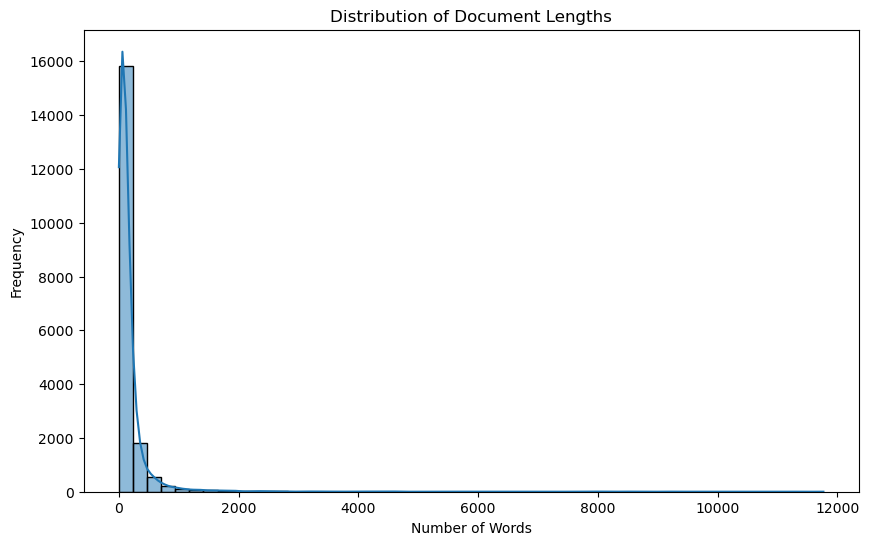

In [12]:
# Calculate number of words in each document for length analysis
doc_lengths = [len(doc.split()) for doc in data]

# Display average document length
print("Average document length (words):", np.mean(doc_lengths))

# Plot the distribution of document lengths to understand text variability
plt.figure(figsize=(10,6))
sns.histplot(doc_lengths, bins=50, kde=True)
plt.title('Distribution of Document Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


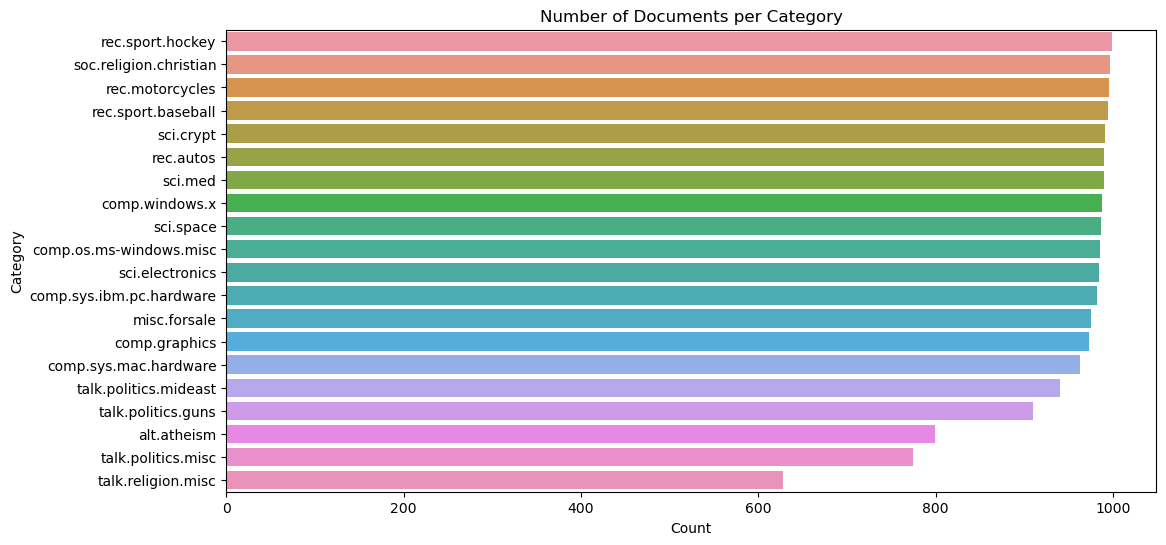

In [13]:
# Convert dataset to pandas DataFrame for easier analysis
df = pd.DataFrame({'text': data, 'target': target})

# Map numeric targets to their respective category names
df['category'] = df['target'].apply(lambda x: target_names[x])

# Plot number of documents in each category to check dataset balance
plt.figure(figsize=(12,6))
sns.countplot(y='category', data=df, order=df['category'].value_counts().index)
plt.title('Number of Documents per Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()



In [14]:
# Import TF-IDF Vectorizer to convert text data into numerical feature vectors
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize vectorizer with stop words removal and frequency thresholds
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=2)

# Fit and transform the dataset
X_tfidf = tfidf_vectorizer.fit_transform(data)

# Display resulting TF-IDF matrix shape (documents x features)
print("✅ TF-IDF matrix created.")
print("Shape:", X_tfidf.shape)


✅ TF-IDF matrix created.
Shape: (18846, 51840)


In [15]:
# Import KMeans clustering model
from sklearn.cluster import KMeans

# Initialize KMeans with 20 clusters (since dataset has 20 categories)
k = 20
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit model on TF-IDF data
kmeans.fit(X_tfidf)

# Retrieve cluster labels for each document
labels = kmeans.labels_

# Confirm clustering completion
print("✅ K-Means clustering done.")


✅ K-Means clustering done.


In [16]:
# Display top terms in each cluster to interpret cluster topics

# Retrieve feature names (words)
terms = tfidf_vectorizer.get_feature_names_out()

# Get indices of top words in each cluster centroid
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

# Loop through each cluster and display its top 10 words
for i in range(k):
    print(f"\n🔷 Cluster {i} top terms:")
    for ind in order_centroids[i, :10]:
        print(terms[ind], end=', ')



🔷 Cluster 0 top terms:
game, team, games, year, hockey, players, season, baseball, play, espn, 
🔷 Cluster 1 top terms:
just, like, time, good, bike, ve, space, don, know, new, 
🔷 Cluster 2 top terms:
people, don, think, say, just, know, like, believe, christian, does, 
🔷 Cluster 3 top terms:
drive, scsi, drives, ide, hard, disk, controller, floppy, cd, hd, 
🔷 Cluster 4 top terms:
car, cars, engine, miles, dealer, new, like, oil, ford, good, 
🔷 Cluster 5 top terms:
window, server, application, program, motif, display, widget, running, use, manager, 
🔷 Cluster 6 top terms:
dsl, n3jxp, cadre, chastity, geb, skepticism, intellect, shameful, pitt, surrender, 
🔷 Cluster 7 top terms:
mail, list, address, information, send, edu, graphics, email, looking, know, 
🔷 Cluster 8 top terms:
gun, government, fbi, people, koresh, batf, law, guns, right, police, 
🔷 Cluster 9 top terms:
thanks, advance, know, does, hi, mail, info, help, anybody, looking, 
🔷 Cluster 10 top terms:
israel, israeli, jews, a

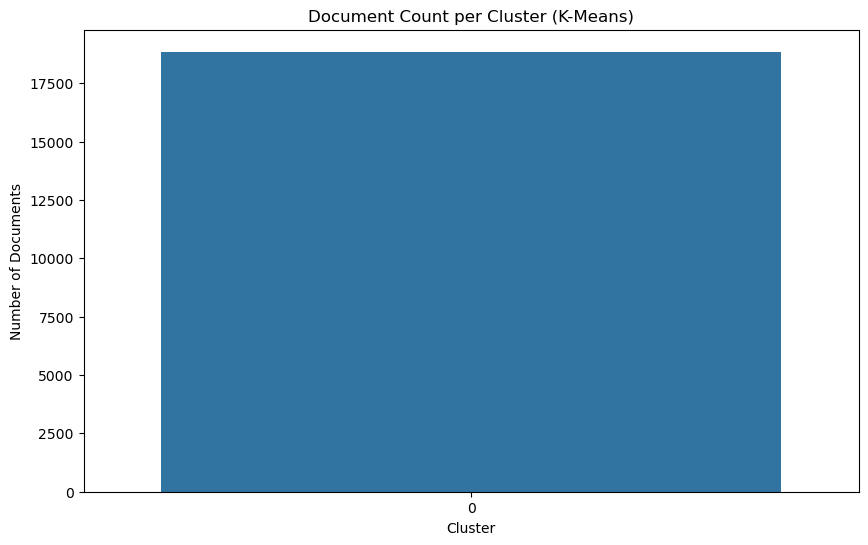

In [17]:
# Visualize number of documents assigned to each cluster

plt.figure(figsize=(10,6))
sns.countplot(labels)
plt.title('Document Count per Cluster (K-Means)')
plt.xlabel('Cluster')
plt.ylabel('Number of Documents')
plt.show()


In [18]:
# Import CountVectorizer for LDA input (requires counts, not TF-IDF)
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with similar parameters
count_vectorizer = CountVectorizer(stop_words='english', max_df=0.5, min_df=2)

# Fit and transform data
X_count = count_vectorizer.fit_transform(data)

# Display matrix shape
print("✅ Count vectorizer matrix created for LDA.")
print("Shape:", X_count.shape)


✅ Count vectorizer matrix created for LDA.
Shape: (18846, 51840)


In [19]:
# Import Latent Dirichlet Allocation model
from sklearn.decomposition import LatentDirichletAllocation

# Initialize LDA with 20 topics
lda = LatentDirichletAllocation(n_components=20, random_state=42)

# Fit model on CountVectorizer data
lda.fit(X_count)

# Confirm topic modeling completion
print("✅ LDA topic modeling completed.")


✅ LDA topic modeling completed.


In [20]:
# Display top words for each topic to interpret them

# Retrieve vocabulary terms
lda_terms = count_vectorizer.get_feature_names_out()

# Loop through each topic and display its top 10 words
for idx, topic in enumerate(lda.components_):
    print(f"\n🔷 Topic {idx} top words:")
    print([lda_terms[i] for i in topic.argsort()[-10:]])



🔷 Topic 0 top words:
['turks', 'soviet', 'turkey', 'history', 'university', 'gm', 'genocide', 'armenians', 'turkish', 'armenian']

🔷 Topic 1 top words:
['window', 'version', 'dos', 'available', 'program', 'files', 'use', 'image', 'windows', 'file']

🔷 Topic 2 top words:
['cancer', 'patients', 'output', 'number', 'disease', 'entry', 'use', 'medical', 'health', 'file']

🔷 Topic 3 top words:
['time', 'year', 'like', 'wire', 'run', 'ground', 'runs', 'good', 'don', 'hit']

🔷 Topic 4 top words:
['team', 'new', 'conference', '10', 'launch', 'april', 'goal', 'play', 'period', 'game']

🔷 Topic 5 top words:
['18', '55', '15', '13', '17', '14', '16', '11', '12', '10']

🔷 Topic 6 top words:
['pc', 'computer', 'software', 'does', 'use', 'like', 'mail', 'card', 'know', 'thanks']

🔷 Topic 7 top words:
['algorithm', 'privacy', 'government', 'security', 'use', 'keys', 'clipper', 'chip', 'encryption', 'key']

🔷 Topic 8 top words:
['lk', 'hz', 'ck', 't7', 'uw', 'ah', 'mv', 'c_', 'w7', 'cx']

🔷 Topic 9 t


Generating WordClouds for topics...


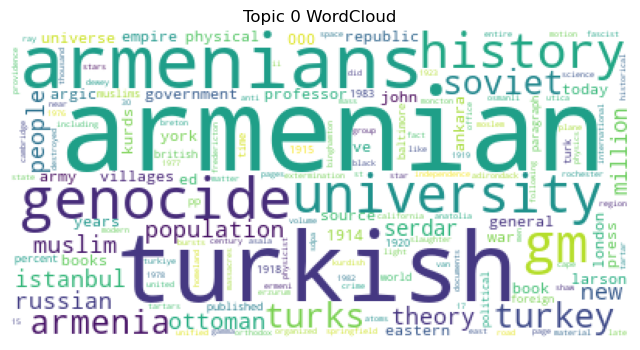

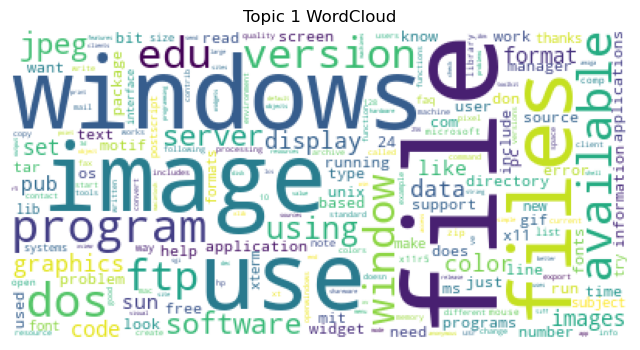

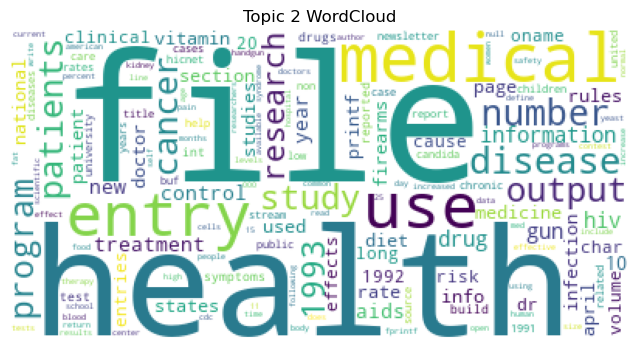

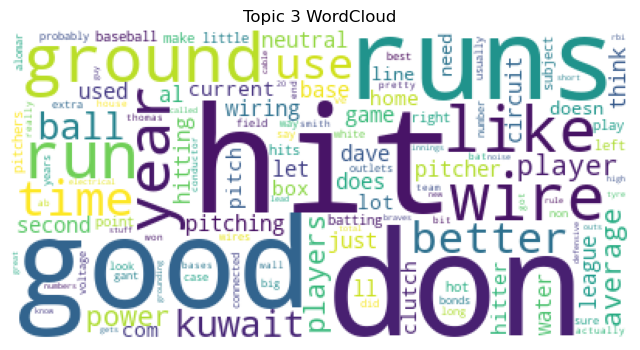

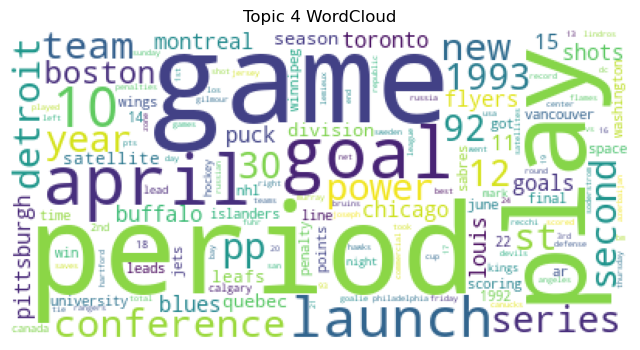

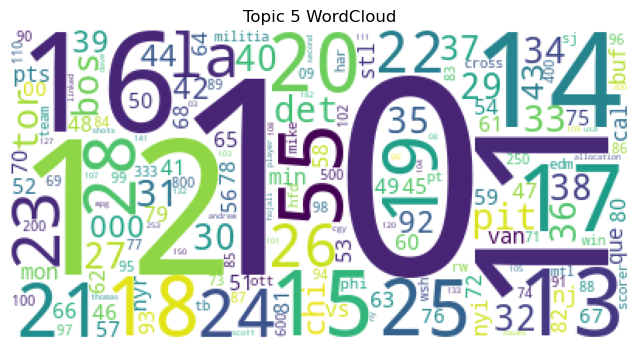

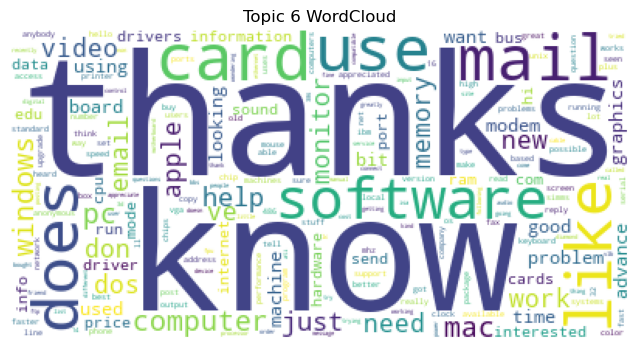

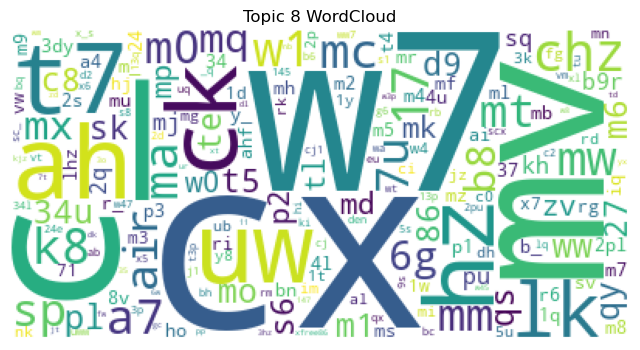

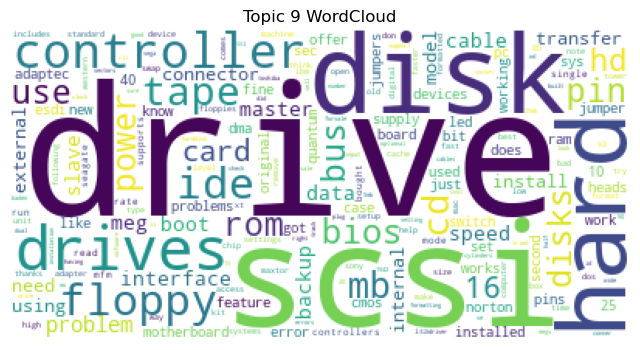

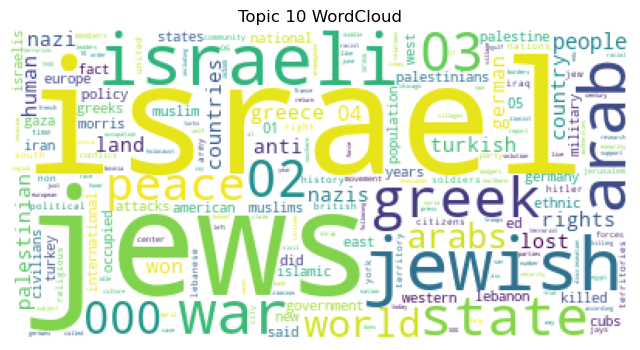

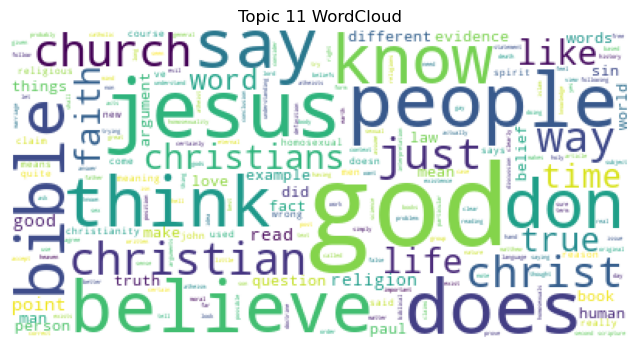

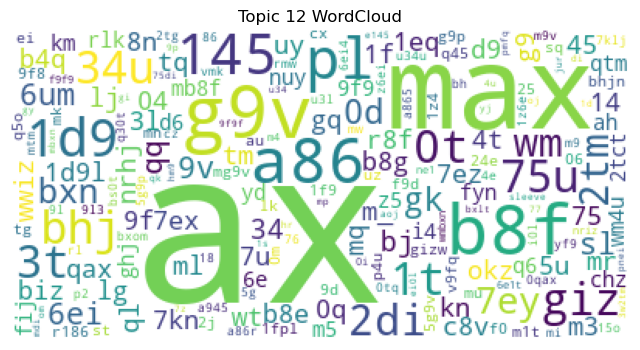

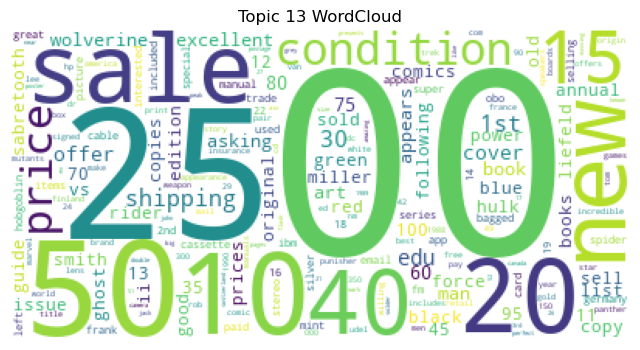

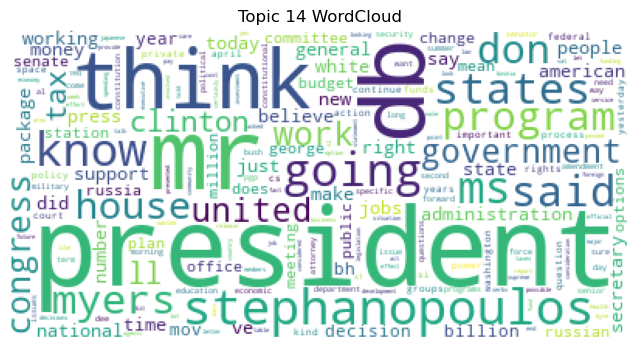

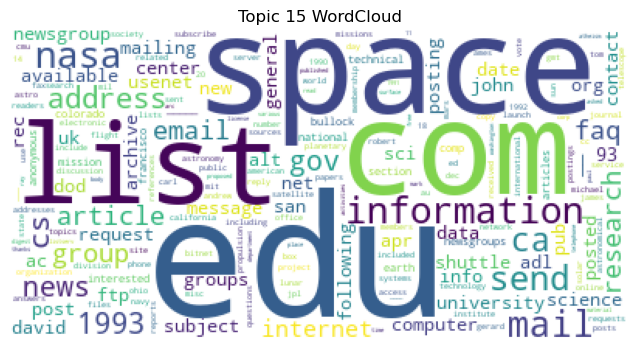

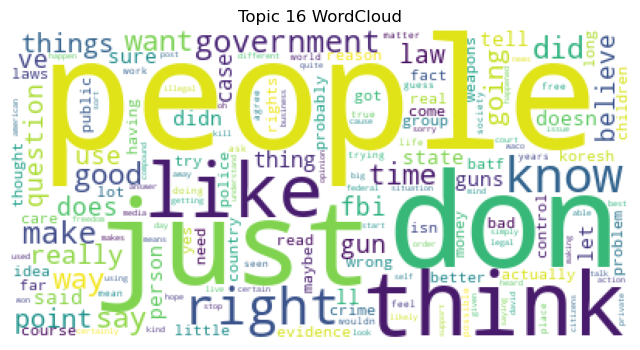

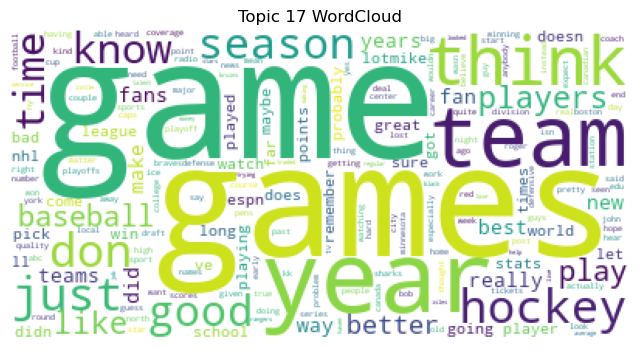

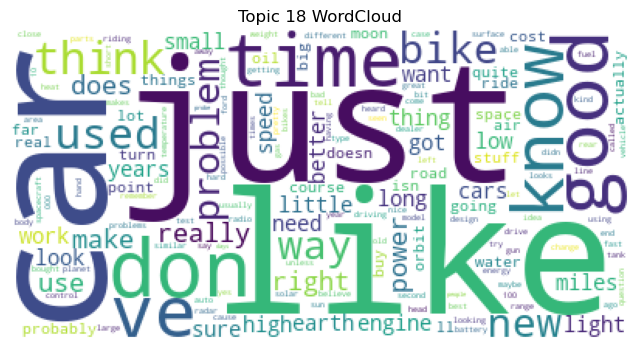

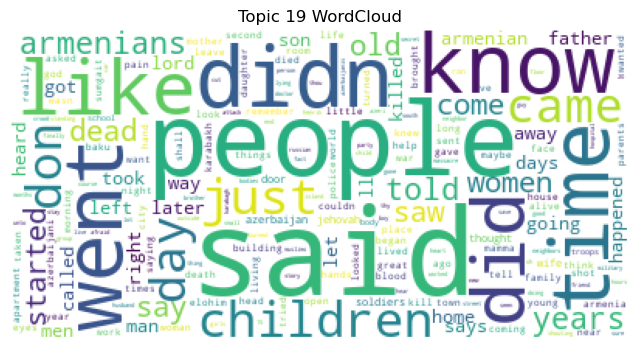

In [21]:
# Import WordCloud for visualization
from wordcloud import WordCloud

# Generate WordCloud for each topic to visualize prominent words

print("\nGenerating WordClouds for topics...")

for idx, topic in enumerate(lda.components_):
    plt.figure(figsize=(8,6))
    plt.imshow(WordCloud(background_color='white').fit_words(dict(zip(lda_terms, topic))))
    plt.axis('off')
    plt.title(f'Topic {idx} WordCloud')
    plt.show()


In [23]:
# Final project summary and learning reflections

print("\n🎯 Project Summary:")
print(f"✔️ Documents processed: {len(data)}")
print(f"✔️ TF-IDF feature space shape: {X_tfidf.shape}")
print("✔️ K-Means clustering formed 20 clusters.")
print("✔️ LDA extracted 20 topics with top keywords visualized using WordClouds.")



🎯 Project Summary:
✔️ Documents processed: 18846
✔️ TF-IDF feature space shape: (18846, 51840)
✔️ K-Means clustering formed 20 clusters.
✔️ LDA extracted 20 topics with top keywords visualized using WordClouds.
